In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/dairy_prices_cleaned.csv")

In [3]:
# Ürün listesi
products = df['Product'].unique()

In [4]:
print(products)

['Whole Milk' 'Skim Milk' 'Cheese' 'Butter']


In [5]:
print(df.columns)

Index(['Date', 'Country', 'Product', 'Price_EUR_per_kg', 'Year', 'Month',
       'Quarter'],
      dtype='object')


21:43:30 - cmdstanpy - INFO - Chain [1] start processing



🧠 Forecasting for: Whole Milk


21:43:30 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\berka\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


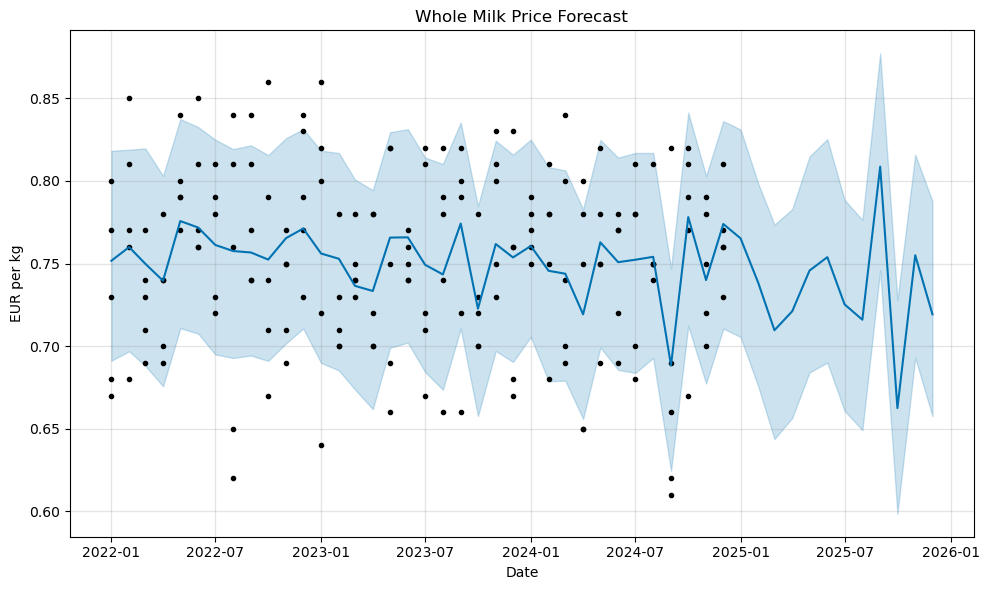

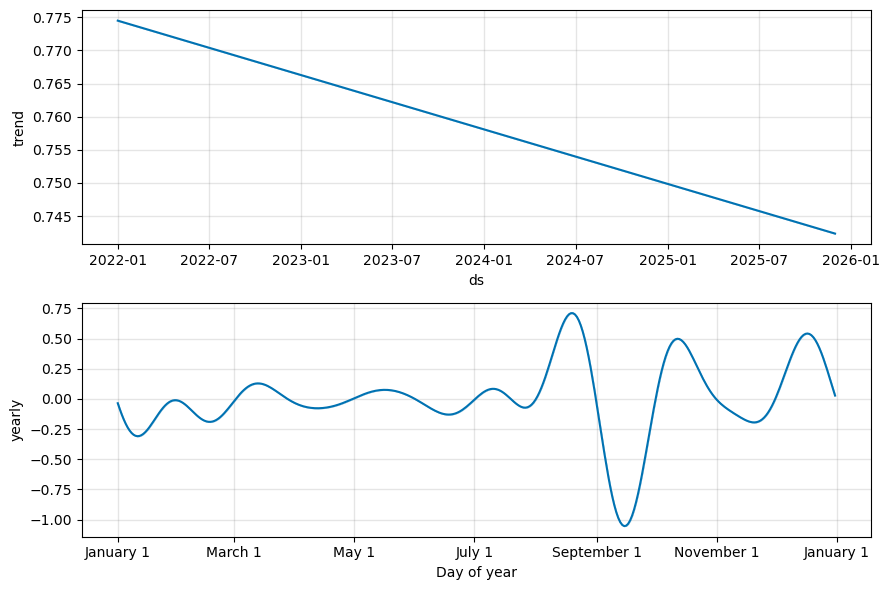

21:43:31 - cmdstanpy - INFO - Chain [1] start processing
21:43:31 - cmdstanpy - INFO - Chain [1] done processing



🧠 Forecasting for: Skim Milk


C:\Users\berka\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


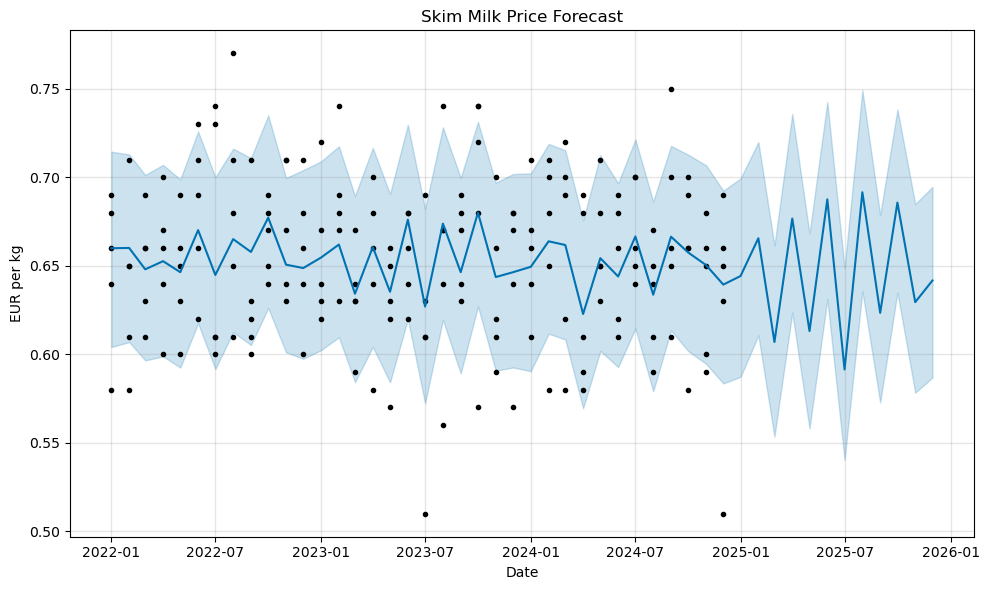

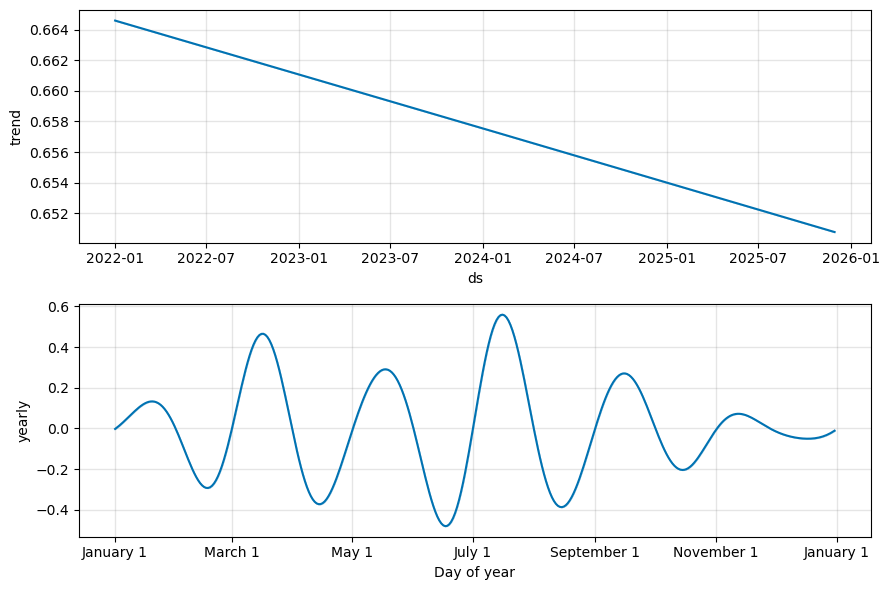

21:43:32 - cmdstanpy - INFO - Chain [1] start processing
21:43:32 - cmdstanpy - INFO - Chain [1] done processing



🧠 Forecasting for: Cheese


C:\Users\berka\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


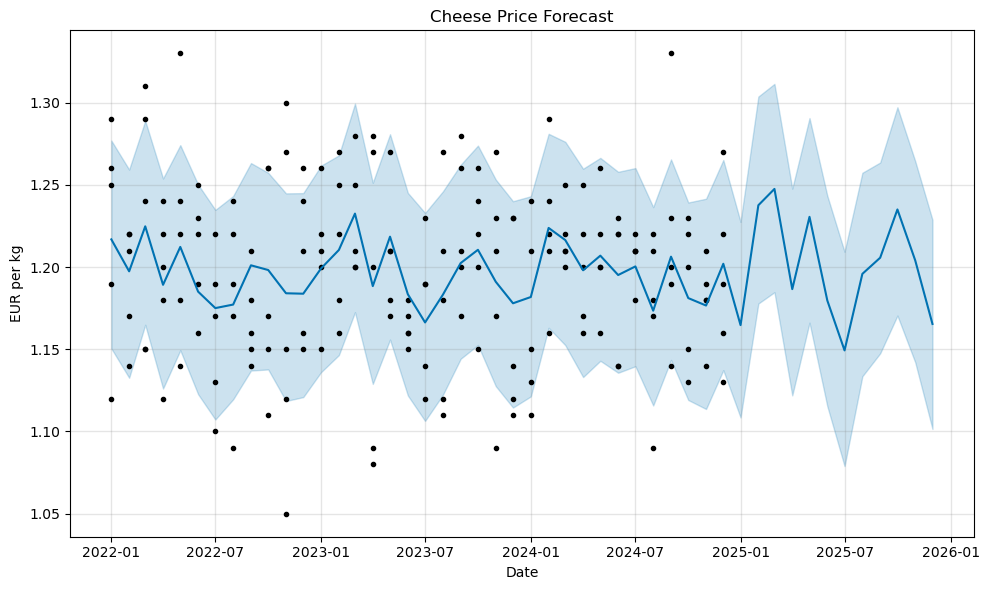

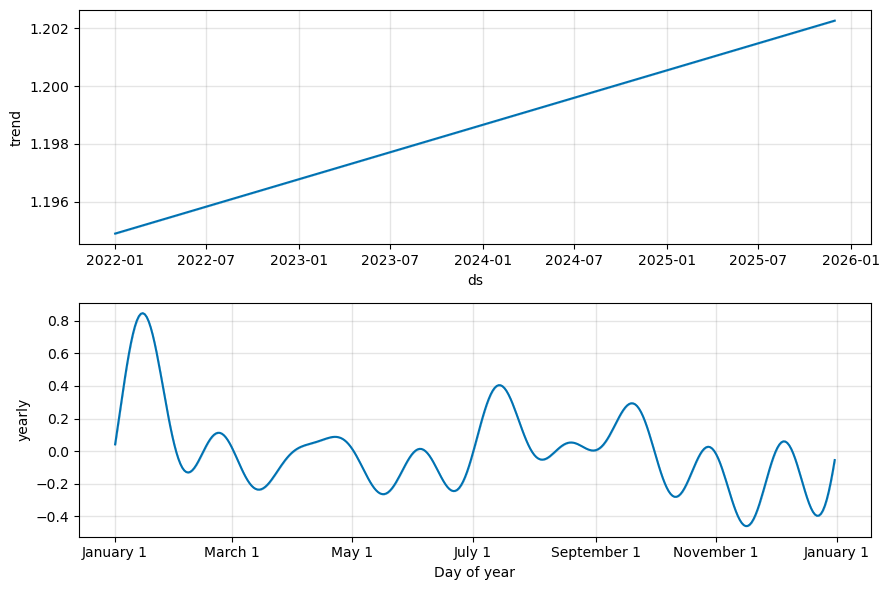

21:43:33 - cmdstanpy - INFO - Chain [1] start processing
21:43:33 - cmdstanpy - INFO - Chain [1] done processing



🧠 Forecasting for: Butter


C:\Users\berka\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


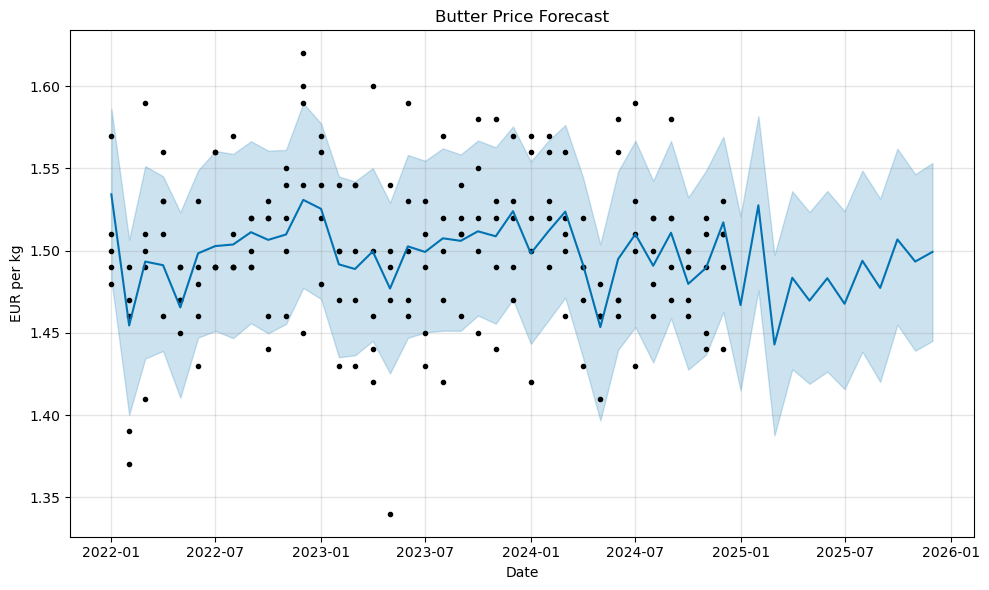

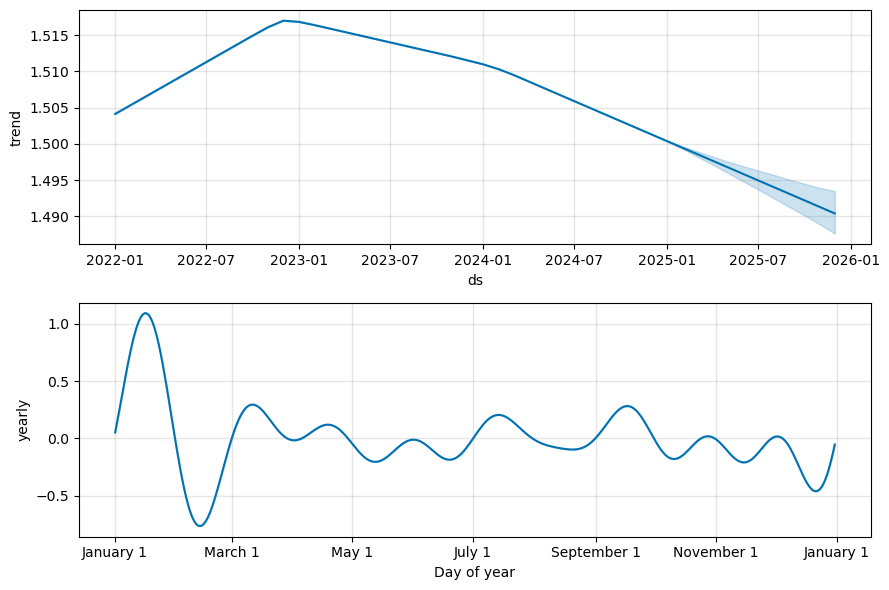

In [7]:
# Creating a Prophet model for each product
for product in products:
    print(f"\n🧠 Forecasting for: {product}")
    
    df_product = df[df['Product'] == product][['Date', 'Price_EUR_per_kg']].copy()
    df_product = df_product.rename(columns={"Date": "ds", "Price_EUR_per_kg": "y"})
    
    # Prophet modeL
    model = Prophet(yearly_seasonality=True)
    model.fit(df_product)

    # 12-month forecast
    future = model.make_future_dataframe(periods=12, freq='M')
    forecast = model.predict(future)

    # Prediction graph
    fig1 = model.plot(forecast)
    plt.title(f"{product} Price Forecast")
    plt.xlabel("Date")
    plt.ylabel("EUR per kg")
    plt.tight_layout()
    plt.show()

    # Component graph
    fig2 = model.plot_components(forecast)
    plt.tight_layout()
    plt.show()

In [9]:
# Save prediction results as CSV
forecast.to_csv("../data/forecast_milk_prices.csv", index=False)
